In [77]:
#google colab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
s=pd.read_csv("student.csv")
s

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,392,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,393,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,394,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
s.isna().sum()

Unnamed: 0    0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
s.dtypes

Unnamed: 0     int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
s._get_numeric_data()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,2,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,3,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,4,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,5,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,392,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,393,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,394,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [ ]:
categorical=[i for i in s.columns if s.dtypes[i]=='object']
categorical

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

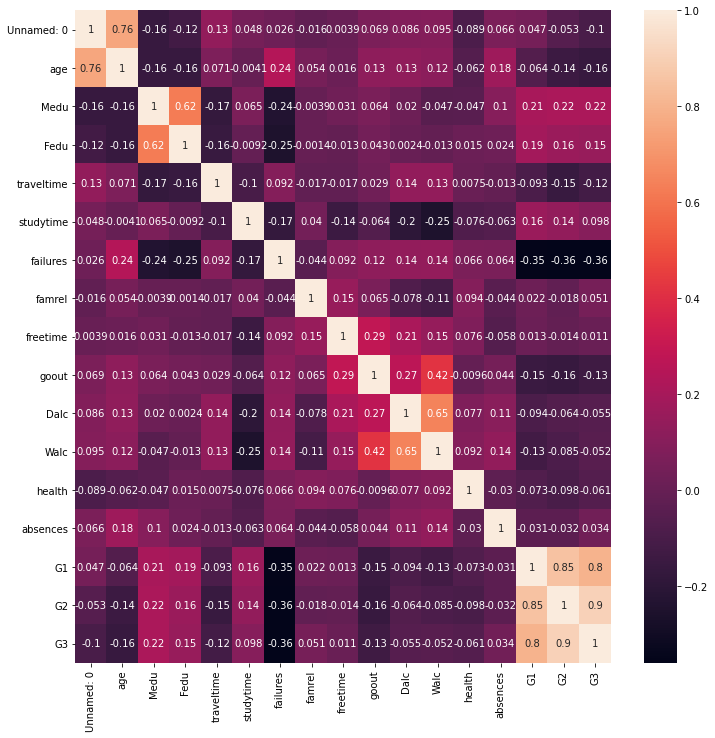

In [ ]:
#correlation before converting any categorical data
plt. figure(figsize=(12,12))
sn.heatmap(s.corr(),annot=True)
plt.show()

Text(0, 0.5, 'Frequency')

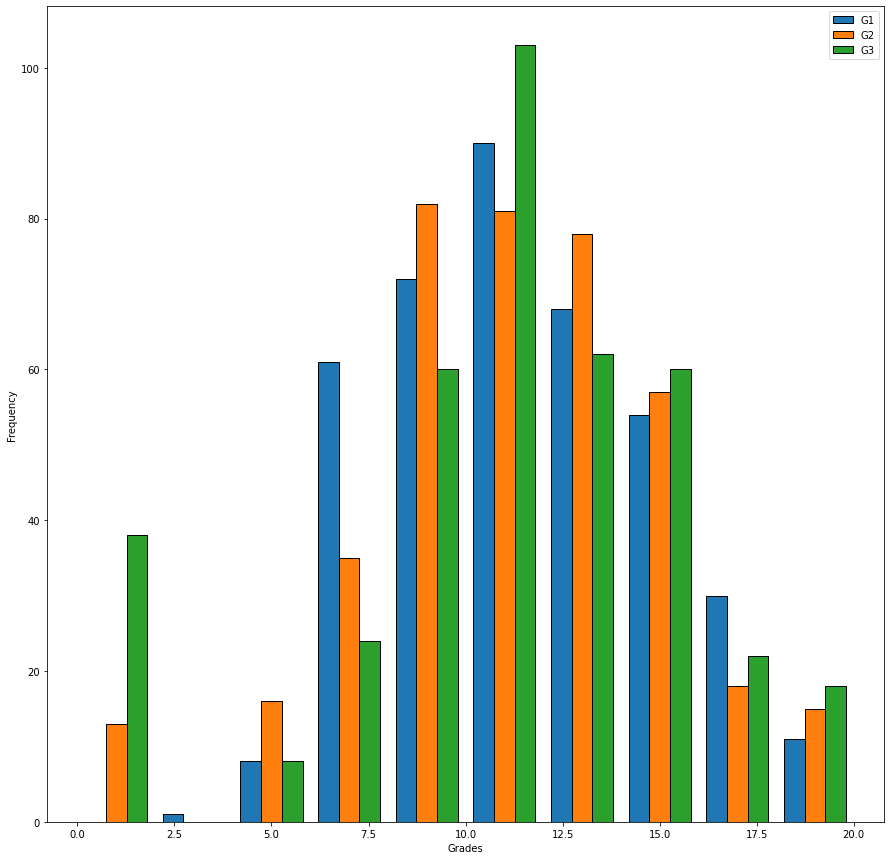

In [ ]:
plt.figure(figsize=(15,15)) 
plt.hist([s['G1'],s['G2'],s['G3']],edgecolor='black',histtype='bar')
# plt.hist(df2['B'],edgecolor='black',histtype='bar')
# plt.hist(df3['C'],edgecolor='black',histtype='bar')
plt.legend(['G1','G2','G3'])
plt.xlabel("Grades")
plt.ylabel("Frequency")


In [ ]:
s1=s.copy()

In [ ]:
#dropping Mjob', 'Fjob', 'reason','guardian' coz grades wouldnt depend on them.
s1=s1.drop(['Mjob','Fjob','reason','guardian'],axis=1)
s1

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,U,LE3,A,2,2,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,392,MS,M,17,U,LE3,T,3,1,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,393,MS,M,21,R,GT3,T,1,1,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,394,MS,M,18,R,LE3,T,3,2,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
# Converting Categorical Variable 'school' into Numerical Variables.
type_mapping = {"GP": 0, "MS": 1}
s1['school']= s1['school'].map(type_mapping)

# Converting Categorical Variable 'sex' into Numerical Variables.
type_mapping = {"F": 0, "M": 1}
s1['sex'] = s1['sex'].map(type_mapping)

# Converting Categorical Variable 'address' into Numerical Variables.
type_mapping = {"R": 0, "U": 1}
s1['address'] = s1['address'].map(type_mapping)

# Converting Categorical Variable 'famsize' into Numerical Variables.
type_mapping = {"LE3": 0, "GT3": 1}
s1['famsize'] = s1['famsize'].map(type_mapping)

# Converting Categorical Variable 'Pstatus' into Numerical Variables.
type_mapping = {"T": 0, "A": 1}
s1['Pstatus'] = s1['Pstatus'].map(type_mapping)

# Converting Categorical Variable 'schoolsup' into Numerical Variables.
type_mapping = {"no": 0, "yes": 1}
s1['schoolsup'] = s1['schoolsup'].map(type_mapping)

# Converting Categorical Variable 'famsup' into Numerical Variables.
type_mapping = {"no": 0, "yes": 1}
s1['famsup'] = s1['famsup'].map(type_mapping)

# Converting Categorical Variable 'paid' into Numerical Variables.
type_mapping = {"no": 0, "yes": 1}
s1['paid'] = s1['paid'].map(type_mapping)

# Converting Categorical Variable 'activities' into Numerical Variables.
type_mapping = {"no": 0, "yes": 1}
s1['activities'] = s1['activities'].map(type_mapping)

# Converting Categorical Variable 'nursery' into Numerical Variables.
type_mapping = {"no": 0, "yes": 1}
s1['nursery'] = s1['nursery'].map(type_mapping)

# Converting Categorical Variable 'higher' into Numerical Variables.
type_mapping = {"no": 0, "yes": 1}
s1['higher'] = s1['higher'].map(type_mapping)

# Converting Categorical Variable 'internet' into Numerical Variables.
type_mapping = {"no": 0, "yes": 1}
s1['internet'] = s1['internet'].map(type_mapping)

# Converting Categorical Variable 'romantic' into Numerical Variables.
type_mapping = {"no": 0, "yes": 1}
s1['romantic'] = s1['romantic'].map(type_mapping)

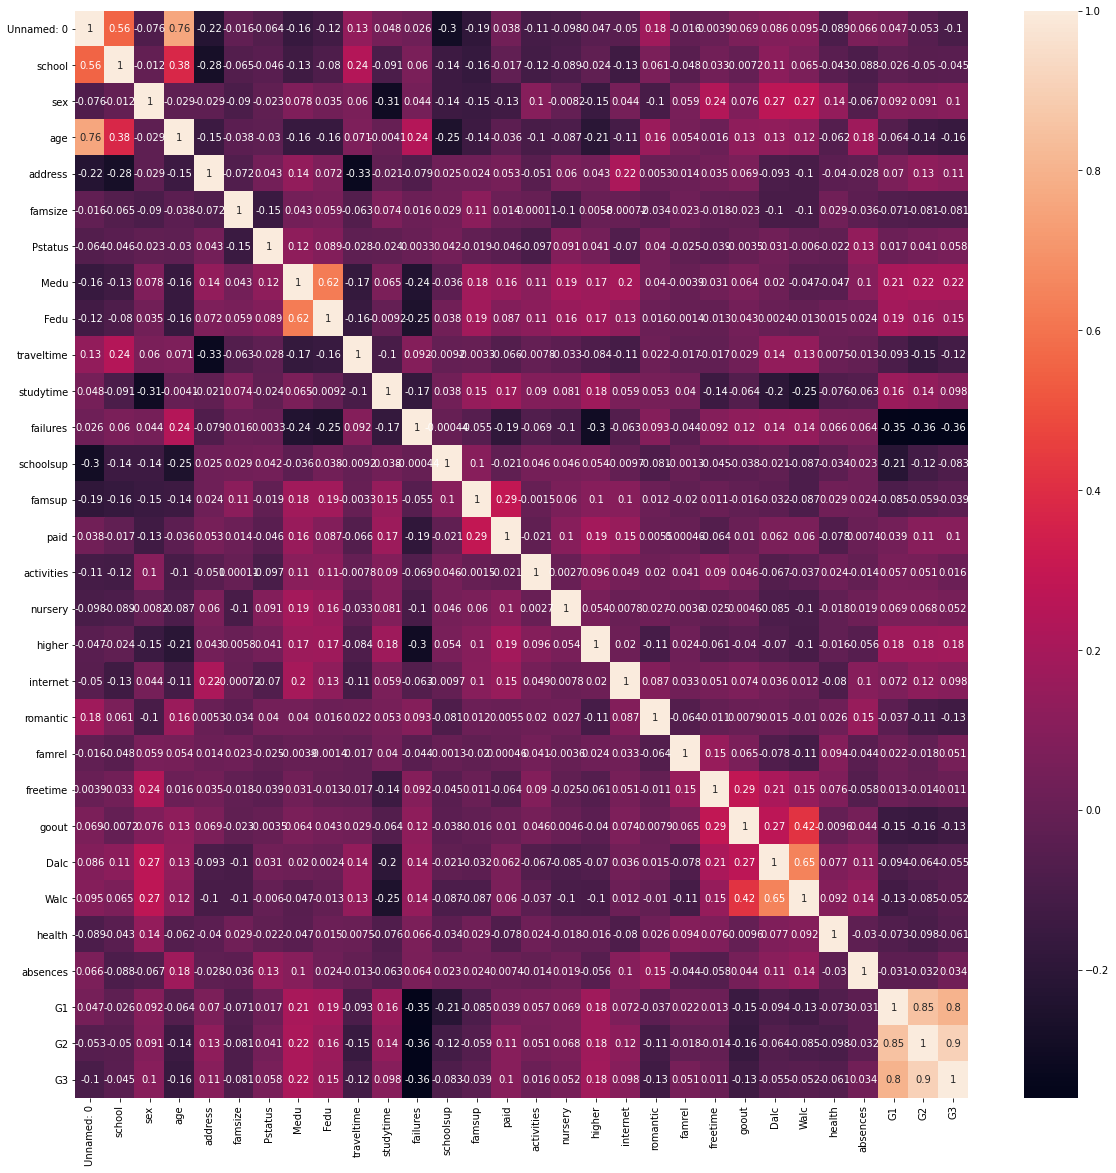

In [ ]:
#correlation after converting some categorical variables to numerical
plt. figure(figsize=(20,20))
sn.heatmap(s1.corr(),annot=True)
plt.show()

In [71]:
#splitting data
train_data = s1[:int(0.7*(len(s1)))]
test_data = s1[int(0.7*(len(s1))):]

In [74]:
Xtrain=train_data.drop(["G3","Unnamed: 0"],axis=1)
Ytrain=train_data["G3"]
Xtest=test_data.drop(["G3","Unnamed: 0"],axis=1)
Ytest=test_data["G3"]


In [76]:
model=LinearRegression(fit_intercept = True, normalize = True)
model.fit(Xtrain,Ytrain)
Ypred = model.predict(Xtest)

Text(0, 0.5, 'Residual')

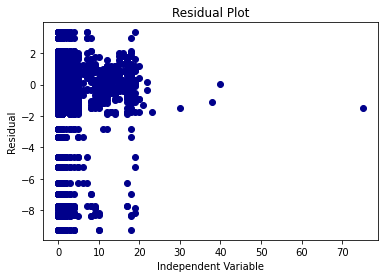

In [81]:
residuals = Ytest-Ypred
plt.plot(Xtest,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")
#as the residual plot isnt random, we might have autocorrelation between independent variables.

In [79]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Ytest, Ypred))
print("Mean Squared Error:", metrics.mean_squared_error(Ytest, Ypred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Ytest, Ypred)))
print("R Squared Score is:", r2_score(Ytest, Ypred))

Mean Absolute Error: 1.3995022209609316
Mean Squared Error: 6.113160445501219
Root Mean Squared Error: 2.4724806259101846
R Squared Score is: 0.7108891391352146


In [82]:
#To find which independent variables actual help in predicting G3
X2 = sm.add_constant(Xtrain)
model_stats = sm.OLS(Ytrain.values.reshape(-1,1), X2).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     70.68
Date:                Fri, 02 Jul 2021   Prob (F-statistic):          1.24e-100
Time:                        11:44:44   Log-Likelihood:                -512.29
No. Observations:                 276   AIC:                             1081.
Df Residuals:                     248   BIC:                             1182.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9205      2.271     -1.726      0.086      -8.393       0.552
school      2.959e-15   2.86e-15      1.034      0.302   -2.68e-15    8.59e-15
sex           -0.0003      0.232     -0.001      0.999      -0.456       0.456
age            0.0554      0.111      0.499      0.618      -0.163       0.274
address        0.0067      0.283      0.024      0.981      -0.551       0.564
famsize        0.2050      0.232      0.882      0.379      -0.253       0.663
Pstatus        0.5824      0.345      1.688      0.093      -0.097       1.262
Medu           0.1894      0.127      1.494      0.137      -0.060       0.439
Fedu          -0.2049      0.123     -1.664      0.097      -0.448       0.038
traveltime     0.1205      0.157      0.769      0.443      -0.188       0.429
studytime     -0.2030      0.134     -1.512      0.132      -0.467       0.061
failures      -0.2442      0.153     -1.595      0.112      -0.546       0.057
schoolsup      0.2299      0.289      0.796      0.427      -0.339       0.799
famsup         0.1725      0.227      0.759      0.448      -0.275       0.620
paid           0.1168      0.225      0.519      0.604      -0.326       0.560
activities    -0.0769      0.212     -0.362      0.717      -0.495       0.341
nursery       -0.2337      0.266     -0.879      0.380      -0.757       0.290
higher         0.8581      0.527      1.628      0.105      -0.180       1.896
internet      -0.3282      0.290     -1.131      0.259      -0.900       0.243
romantic      -0.2209      0.230     -0.961      0.338      -0.674       0.232
famrel         0.3764      0.116      3.248      0.001       0.148       0.605
freetime       0.0327      0.111      0.296      0.768      -0.185       0.251
goout         -0.1483      0.104     -1.423      0.156      -0.353       0.057
Dalc          -0.1902      0.154     -1.236      0.218      -0.493       0.113
Walc           0.2463      0.114      2.155      0.032       0.021       0.471
health         0.0147      0.074      0.199      0.843      -0.131       0.161
absences       0.0238      0.016      1.533      0.126      -0.007       0.054
G1             0.1244      0.059      2.104      0.036       0.008       0.241
G2             0.9617      0.049     19.600      0.000       0.865       1.058
==============================================================================
Omnibus:                      160.141   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1193.949
Skew:                          -2.284   Prob(JB):                    5.46e-260
Kurtosis:                      12.108   Cond. No.                     1.01e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is